# Calculations involving uncertainties in measurements

## In General Physics, you were taught about how measurements have "errors" or uncertainties.

For example, if you use a meter stick to measure the area of a table top. You might get results like,

$$L = 100.0 cm + 25.0 cm = 125.0cm, W = 75.0 cm$$

So the area much be calculated with,

$$ A = 125.0 cm*75.0 cm = 9375 cm^2 = 9380 cm^2~(3~sig~figs)$$

If this seems artificial to you, you are right! There are mathematical ways to actually propagates uncertainties using statistical analysis of random and systematic errors.


## Let's take a look at this measurement.
My General Physics Lab students measured the length of 40 different wooden rods cut to be approximately 10 cm using a meter stick with a precision of 1 mm.<br>
Length [cm] =<br>
[ 9. ,  9.8, 10.4, 11.1, 10.2,  9.5, 10. , 10.5,  9.8, 10. , 11.5,<br>
       10.3,  9.5, 10.2, 10.4, 11. , 10. ,  8.9,  9. , 10.1,  9.9, 10.7,<br>
       10.6, 10.3, 10.1,  9.6,  9.2,  9.3,  9.4, 10.3, 10.2,  9.5, 10.4,<br>
       10.6,  9.3,  7.8,  9.1, 10.1,  9.7, 11.5, 10.9,  8.8, 10.6,  8.7,<br>
       10.5,  9.4,  9.8,  8.2, 10.6,  9.8]<br>

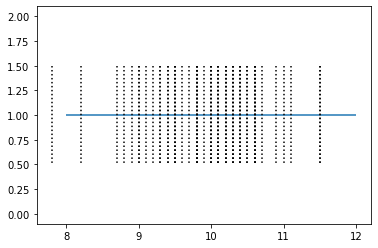

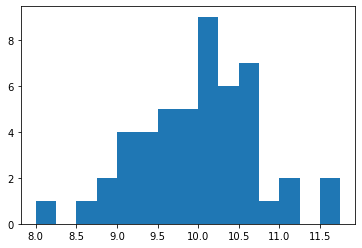

In [5]:
import numpy as np
import matplotlib.pyplot as plt
L  = np.array([ 9. ,  9.8, 10.4, 11.1, 10.2,  9.5, 10. , 10.5,  9.8, 10. , 11.5,
       10.3,  9.5, 10.2, 10.4, 11. , 10. ,  8.9,  9. , 10.1,  9.9, 10.7,
       10.6, 10.3, 10.1,  9.6,  9.2,  9.3,  9.4, 10.3, 10.2,  9.5, 10.4,
       10.6,  9.3,  7.8,  9.1, 10.1,  9.7, 11.5, 10.9,  8.8, 10.6,  8.7,
       10.5,  9.4,  9.8,  8.2, 10.6,  9.8])

#plt.plot(L)
#plt.show()

#plt.figure()
plt.hlines(1,8,12)  # Draw a horizontal line
plt.eventplot(L, colors='black',lineoffsets=1, linelengths=1,linestyles="dotted")
plt.show()

plt.hist(L, bins=np.arange(8,12,0.25))
plt.show()

### Interpretation of the Data
The measurement seems to spread from 8 cm to 12 cm. So if you're the student who has measured a 8 cm stick. Is that answer wrong? 

One thing to note is the measurements  / data should never be called "wrong". Because the student might have made a mistake in the measurement, the rods wasn't cut very well, the meter stick was not manufactured well. These are known as measurement Errors / Uncertainties.

### Systematic Uncertainties
These are uncertainties due to the instrument, tools, parts that was used to make the measurement. <br>

From the example: Meter stick precision, rods not cut well.<br>

Another way to think about it is that it DOES NOT get better if you take more measurements.<br>

This produces a uncertainty that can either biased the measurement or make it seem to go up and down between different tools.<br>

### Statistical Uncertainties
These are uncertainties due to each measurement actually being slightly different from another. <br>

From the example: The student not lining up the measurement. <br>

This type of uncertainties tends to get smaller if you repeat the measurement more times.<br>

Another statistical uncertainty is in random process such as: nuclear decay , counting particles, quantum fluctuation of light production in detectors.<br>


### Propagation of Errors
This requires you to REALLY understand the experiment, the instrument and tools you're using.<br>

In the example, let's assume the metersticks are all made to the precision of 1 mm or       0.1 cm. This adds an uncertainty of $\pm0.1$ cm to our measurement.<br>

However, the rods might be made only up to be within 1 cm. So this adds another $\pm1.0cm$ to our uncertainty.<br>

The students might be liable for making an estimation mistake of $\pm0.5cm$.

To combine these uncertainties together we can't simply add them. Sometime one measurement with be 0.1cm too high in the meterstick, but the rods might be cut too short by 1.0cm and the student measured it high by 0.5cm. So this actually makes the measure 9.6cm instead! Some of the Errors actually offset each other.<br>

In general, if you have a measurement you're making that has some uncertainty in it. We can write the equation for this as, <br>

$$ L = L_{real}\pm\delta_{meterstick}\pm\delta_{rod}\pm\delta_{student}$$

Typically, we combine the systematic together and statistical is quoted seperately.<br>

To combine, $\delta_{meterstick}$ and $\delta_{rod}$, we use the propagation of errors.<br>

The most general form is if you have a function that depends on multiple variables,<br>
$$ w(x,y,z,....)$$
$$ x\pm\delta_x$$
$$ y\pm\delta_y$$
$$ z\pm\delta_z$$
$$ ... $$

The uncertainty in the resulting function is,

$$ \delta w = \sqrt{(\frac{\partial w}{\partial x}\delta x)^2+(\frac{\partial w}{\partial y}\delta y)^2+(\frac{\partial w}{\partial z}\delta z)^2}$$

For the examples, the uncertainties adds so the function is:<br>
$$ L(m,r,s) = L_{real}\pm\delta_{m}\pm\delta_{r}\pm\delta_{s}$$

This makes the derivates easy to calculate,
$$\frac{\partial L}{\partial (\delta m)} =\frac{\partial L}{\partial (\delta r)}=\frac{\partial L}{\partial (\delta s)}= \pm1$$
So the error on L is,
$$\delta L = \sqrt{(1*\delta m)^2+(1*\delta r)^2+(1*\delta s)^2}$$
## Separating Systematic and Statistical Errors.
When you see a value in a scientific paper, the author will separate these two errors because Systematic stays the same no matter how much data you collect. Statistical Errors **COULD** decrease if you collect more data. This is typically written like, $X = 1.23 \pm0.12 \pm 0.32$ m. For our example we have,
$$\delta L_{sys} = \sqrt{(1*\delta m)^2+(1*\delta r)^2} =\sqrt{.1^2+1.0^2}= 1.005 \approx 1.0cm$$
$$\delta L_{stat}= \delta s = 0.5 cm$$ 
This means we should quote our value to be the average of those measurements with the uncertainties stated. To calculate the average we can just use python.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
print(L.mean())
print(np.average(L)) ## Mean and Average is Sum(L)/len(L)
print("be careful not to use the median", np.median(L)) ## this is the just the middle value of the array after sorting

#[1,2,3,4,4,8,8,8,8]

9.922
9.922
be careful not to use the median 10.0


So now we can actually state our measurement.
$$ L = 9.9 \pm 1.0 \pm 0.5 cm$$
We round to the 10th's place because the uncertainties are to the one's or 10th's place. There's no reason to state values that is more than an order of magnitude below your uncertainties. That 0.02 value does not have meaning because we know that the values we measure is actually $\pm1.0$ish.

## Statistics of Measurements

If we look at this value we just measured, how does having the uncertainties of it help us?

A) How precise the measurement is
B) If we repeated our measurement in the future, what would be the probability we get the same thing?

### Frequentist  Statistical Approach

In statistics, if when you mean the central values and know the uncertainty of it. You can relate that to the Standard Deviation of the measurement.

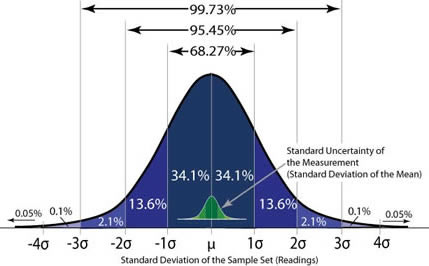

The measure L below states that,
$$ L = 9.9 \pm 1.0 \pm 0.5 cm$$ 
The next measurement will be within 1.1 cm of 9.9cm 68.28\% of the time.


The standard deviation of a measurement tells us, if we were to repeat the same measurement one more time. What's the chance we'll end up within.<br>
$$ 1 \sigma = 68.3\%$$ 
$$ 2 \sigma = 95.5\%$$ 
$$ 3 \sigma = 99.7\%$$

You don't have to memorized every $n \sigma$, you can find it by thinking one sigma has about 16% on either side.<br>
Two sigma will have $0.16^2=0.0256$ on each side which is 5% on bothsides. 1-5%= 95%<br>
Three sigma will have $0.16^3 = 0.005$ on each side  which is 1% on bothside. 99%<br>

Five sigma will be $0.16^5 = 1\times10^{-4}$ or $1-2\times10^{-4} = 99.98\%$<br> 

The uncerntainties we calculated above will approach the Standard Deviation IF AND ONLY IF: A) The uncertainties are random, B) as the number of measurements goes to infinity.<br>

We can check this by calculating the Root Mean Square of our measurements.

$$ RMS = \sqrt{\frac{\delta x_1^2+\delta x_2^2+\delta x_2^2+\delta x_4^2+\delta x_5^2+....}{N}}$$
Where the delta x are the different between the average value and the individual measurements.
$$ \delta x_i = \overline{x}-x_i$$

Length [cm] =
[ 9. , 9.8, 10.4, 11.1, 10.2, 9.5, 10. , 10.5, 9.8, 10. , 11.5,
10.3, 9.5, 10.2, 10.4, 11. , 10. , 8.9, 9. , 10.1, 9.9, 10.7,
10.6, 10.3, 10.1, 9.6, 9.2, 9.3, 9.4, 10.3, 10.2, 9.5, 10.4,
10.6, 9.3, 7.8, 9.1, 10.1, 9.7, 11.5, 10.9, 8.8, 10.6, 8.7,
10.5, 9.4, 9.8, 8.2, 10.6, 9.8]

The $RMS * \sqrt{2}$ will give you the standard deviation. Let's see if this is true for our data!


In [10]:
import numpy as np
import matplotlib.pyplot as plt


RMS = np.sqrt(((9.922-L)**2).sum()/len(L)) # this is very confusing Don't do this at first.
print("RMS = ",RMS)
print("Standard Deviation = ",np.sqrt(2)*RMS)
#calc delta x_i

delta_xi = 9.922-L # result is array of len 40
delta_xi_sqr = delta_xi**2 # result of array len 40
delta_xi_sqr_sum = sum(delta_xi_sqr)  # result just a single number
print("RMS long",np.sqrt(delta_xi_sqr_sum/len(L)))
print("RMS*sqrt(2) = ",np.sqrt(delta_xi_sqr_sum/len(L))*np.sqrt(2.))


RMS =  0.7653208477494912
Standard Deviation =  1.082327122454205
RMS long 0.7653208477494913
RMS*sqrt(2) =  1.0823271224542053


The errors we estimated is $\pm1.0\pm0.5\approx1.1$. That's exactly what the Standard Deviation predicts!!!

### Bayesian Statatistics
This method utilizes a more theoretical view of statistics but requires a theoretical assumption to find the probability of the next measurement. It is often more useful in social or biological sciences where you often cannot make improved measurements. For a quick view of this watch Veratism's video on it. Google, Veritasium Bayesian Trap or the link below.

https://www.youtube.com/watch?v=R13BD8qKeTg




## Least / Chi Square Fitting

Least Square is a statistical method to compare data to a model.<br>

We're going to use Exercise 3.8 to take us through how least square statistics works.<br>

Least Square is done by computing the differents between your model to your data<br>

<img src="PhotoElectricPlot.png" width="500">

In the figure above we're trying to compare the data to a straight line<br>


Kinetic of an Electron: $K = m E_{\gamma}-\phi$<br>
So the model is: $y_{th} = mx+b$<br>

We want to compute the difference between the model and the data. So we compute the least square (also known as Chisquare)<br>
$$ \chi^2 = \Sigma (y_{th} - y_{exp})^2 = \Sigma ( mx_i+b - y_i)^2$$
The square make sure the difference in each term is positive so 
both underprediction and overprediction are treated the same.<br>
Computing this allows us to measure how different the model and data are to each other.<br>

To find for what parameters, m and b this function will be minimize, we have to find the zeroes of the 1st derivatives. You might remember this as variation of parameters in Calculus.<br>
$$ \frac{\partial}{\partial m}\chi^2 = 2 \Sigma (mx_i+b-y_i)x_i = 2 ( m\Sigma x_i^2 +b\Sigma x_i - \Sigma x_iy_i) = 0  $$
$$ \frac{\partial}{\partial b}\chi^2 = 2 \Sigma (mx_i+b-y_i) = 2( m \Sigma x_i + bN -\Sigma y_i) = 0 $$
Where N is the number of data points, so the Sum of b, N times is just bN.<br>
Declaring,<br>
$$ E_x = \frac{\Sigma x_i}{N}   ~~~ E_y = \frac{\Sigma y_i}{N} ~~~~ E_{xx} = \frac{\Sigma x_i^2}{N} ~~~~ E_{xy} = \frac{\Sigma x_iy_i}{N}$$

We can substitute in these variables into the partial derivatives above,<br>

$$ mE_{xx} + b E_x = E_{xy} $$
$$ mE_x + b = E_y $$

We can solve for m and b,<br>
$$ m = \frac{E_{xy}-E_xE_y}{E_{xx}-E_x^2}$$
$$ b = \frac{E_{xx}E_y-E_xE_{xy}}{E_{xx}-E_x^2}$$

We can compute $E_x , E_y , E_{xx}, E_{xy}$ over the data and it will give us the zero of the partial derivative. This will either be the maximum or minimum of the chisquare function.<br>

We can visualize this minimization using a 3D graph like this,

<img src="ChiSquareMinimizationOneSolution.png">
Source:http://astro.physics.uiowa.edu/~kaaret/2019f_p4905/L17.html

This is possible for linear fit only. Any function that is higher order will not be solvable analytically.<br>

There are also multiple zeroes if the derivative which leds to multiple solutions<br>

<img src="ChiSquareMinimization.png">
http://astro.physics.uiowa.edu/~kaaret/2019f_p4905/L17.html

When you're doing a Chisquare Fit / Minimization for any function more complex than a linear. **YOU HAVE TO CHOOSE YOUR INITIAL VALUES CAREFULLY**

Typically minimization method will start at your initial value of the parameters. <br>
Find the gradient at that point, $ \partial \chi^2 / \partial ~a~ ,~ \partial \chi^2 / \partial b ~...$ <br>
Change the parameter values by some small increment (known as a step-size) in the direction **NEGATIVE OF THE GRADIENT**<br>

### Python Curve Fitting Packge

This package is in scipy (Scientific Python)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

Let's look at how this work with an exponential growth data. <br>

Number of Deaths in California due to Covid and Number of Cases<br>
Downloaded from, https://data.ca.gov/group/covid-19 <br>
This day contains Deaths and Cases for Covid-19 since March 2020.<br>




In [11]:
from numpy import loadtxt, linspace
Deaths,Cases = loadtxt("CovidData.csv",int,skiprows=1,usecols=(1,2), delimiter=",", unpack=True)

for irow in range(10):
    print("First 10 data points", Deaths[irow], Cases[irow])
    
for irow in range(-11,-1):
    print("Last 10 data points", Deaths[irow], Cases[irow])


First 10 data points 47507 3416147
First 10 data points 47107 3412057
First 10 data points 47043 3406365
First 10 data points 46843 3399878
First 10 data points 46435 3391036
First 10 data points 46002 3381615
First 10 data points 45456 3371556
First 10 data points 44995 3362981
First 10 data points 44477 3354591
First 10 data points 44150 3346340
Last 10 data points 5 252
Last 10 data points 4 202
Last 10 data points 4 202
Last 10 data points 0 157
Last 10 data points 0 133
Last 10 data points 0 114
Last 10 data points 0 88
Last 10 data points 0 69
Last 10 data points 0 60
Last 10 data points 0 53


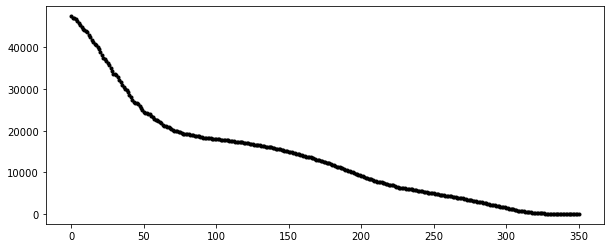

In [12]:
from pylab import plot,show, figure
tdays = range(0,len(Deaths))

figure(figsize=(10,4))
plot(tdays,Deaths,"k.")
show()

<h3>Notice that the values are backward from what we want. The data goes backward in time to Marth 4th 2020.<br>
This can be fix with a numpy function flip!

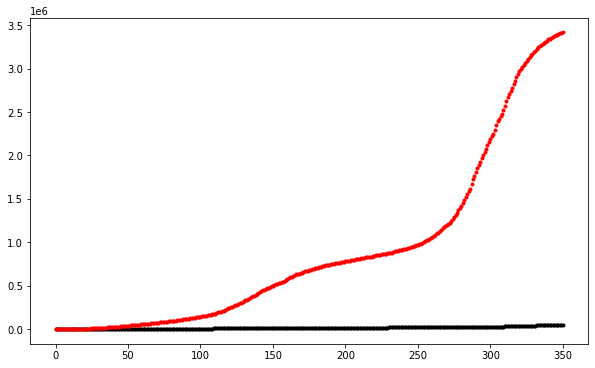

In [13]:
from numpy import loadtxt, flip
Deaths,Cases = loadtxt("CovidData.csv",int,skiprows=1,usecols=(1,2), delimiter=",", unpack=True)

from pylab import plot,show, figure

Deaths=flip(Deaths)
Cases=flip(Cases)
tdays = range(0,len(Deaths))

figure(figsize=(10,6))
plot(tdays,Deaths,"k.")
plot(tdays,Cases,"r.")
show()

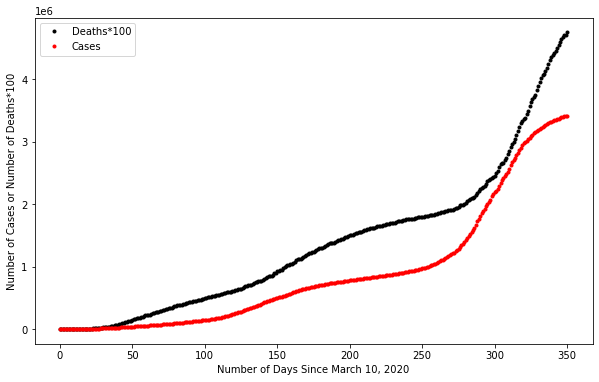

In [5]:
# Notice that the number of deaths is very small compared to cases.
# we can scale the number of deaths so we can see on the plot more easily 
# But we HAVE TO LABEL it so people don't think there's 100,000 deaths...

from numpy import loadtxt, flip
from pylab import plot,show,legend,figure, xlabel, ylabel

Deaths,Cases = loadtxt("CovidData.csv",int,skiprows=1,usecols=(1,2), delimiter=",", unpack=True)
Deaths=flip(Deaths)
Cases=flip(Cases)
tdays = range(0,len(Deaths))


figure(figsize=(10,6))
plot(tdays,Deaths*100,"k.",label="Deaths*100")
plot(tdays,Cases,"r.",label="Cases")
xlabel("Number of Days Since March 10, 2020")
ylabel("Number of Cases or Number of Deaths*100")
legend()
show()

## Uncertainties in Data
Typically each data point will come with an uncertainty that has to be measured<br>

For example, in the rod length measurement quoted the value to be $L = 9.9 \pm1.0 \pm0.5 cm$<br>

Since this dataset is only counting the number of cases and deaths. We don't really have a systematic uncertainty.<br> 

We can evaluation the statistical uncertainty using Poisson statistics or Gaussian Staistics.<br>

Let's start with Poisson Statistic (the more correct one).

$$ P_{Poisson} = \frac{\mu^r exp(-\mu)}{r!}$$

<img src="Poisson.png">
Source:https://depts.washington.edu/imreslab/2011%20Lectures/ErrorProp-CountingStat_LRM_04Oct2011.pdf

$\mu$ is the mean from your measurement. P(r) can give you the probability of measuring r with that given mean, $\mu$.<br>

The variance = the mean in a Poisson distribution so we can calculate the stadnard error using,

$$ \delta \mu = \sqrt{\mu}$$

This number isn't really correct for low number of events, such as $\mu = 1.0$, we can see that the data does not vary symmetrically around 1.0. To actually get the asymmetric errors we need to integrate to the left until we get 68.27\%/2. Then do the same going to right for a given Poisson distribution. So for a given $\mu$ you'll have to generate a poisson and calculate how far you have to move r to get the $\pm1 \sigma$ coverage.<br>

There are shortcuts to this by shifting the errors up and down slightly on both sides,<br>
$$ \sigma_+ = 0.5 + \sqrt{N+0.25}$$
$$ \sigma_- = -0.5 + \sqrt{N+0.25}$$

On the table below, we can use it gives almost the 68.27\% coverage we want.<br>

|N | low      | high     |coverage|
|- |--------- | ---------|--------|
|0 |0.000000  |1.000000  |0.632121|
|0 |0.000000  |1.000000  |0.632121|
|1 |0.381966  |2.618034  |0.679295|
|2 |1.000000  |4.000000  |0.681595|
|3 |1.697224  |5.302776  |0.682159|
|4 |2.438447  |6.561553  |0.682378|
|5 |3.208712  |7.791288  |0.682485|
|6 |4.000000  |9.000000  |0.682545|
|7 |4.807418  |10.192582 |0.682582|
|8 |5.627719  |11.372281 |0.682607|
|9 |6.458619  |12.541381 |0.682624|


Poisson Statistics is for low number of counts say between 3 to 9, but as the number of counts goes up it can be closely estimate by Gaussian Statistics<br>

$$ P_{Gaus} = \frac{1}{\sigma \sqrt{2\pi}} exp(\frac{-(r-\mu)^2}{2\sigma^2})$$

<img src="GaussianStat.png">
For the Gaussian case, $\delta N = \sqrt N$ exactly. Which we can use when the number of counts is above 10.<br>


We can calculate this in the Covid Data, there are some data points with Poisson Errors but it will have a very small effect since majority of the data will have counts greater than 10.


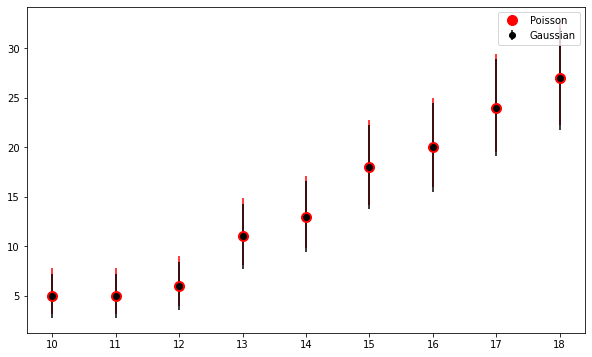

In [8]:
from numpy import loadtxt, flip, sqrt
from pylab import plot,show,legend, errorbar,figure,yscale

Deaths,Cases = loadtxt("CovidData.csv",int,skiprows=1,usecols=(1,2), delimiter=",", unpack=True)

dayMin = 10
dayMax = 19
Deaths=flip(Deaths)
ErrDeaths = sqrt(Deaths)

ErrHighDeaths= 0.5+sqrt(Deaths+0.25)
ErrLowDeaths= -0.5+sqrt(Deaths+0.25)

tdays = range(dayMin,dayMax)

figure(figsize=(10,6))                 
errorbar(tdays,Deaths[dayMin:dayMax],
         [ErrLowDeaths[dayMin:dayMax],
          ErrHighDeaths[dayMin:dayMax]],
         ls='',marker='o', mfc='red',ms=10,mec='red',ecolor='red',label="Poisson")
errorbar(tdays,Deaths[dayMin:dayMax],
         ErrDeaths[dayMin:dayMax],
        ls='',marker='o', mfc='black',ms=6,mec='black',ecolor='black',label="Gaussian")
    
legend()
show()

[-5.78272272  2.22444259  0.15751379]


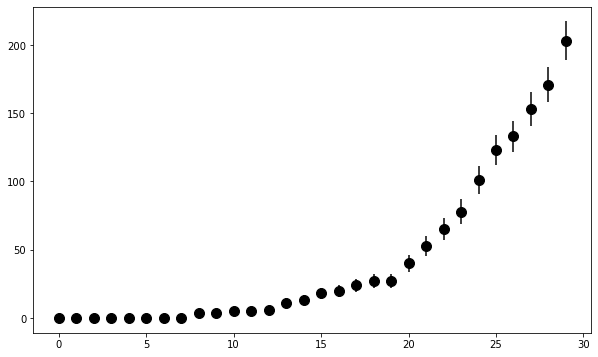

In [20]:
from numpy import loadtxt, flip, sqrt, exp
from pylab import show,legend, errorbar,figure,yscale

Deaths,Cases = loadtxt("CovidData.csv",int,skiprows=1,usecols=(1,2), delimiter=",", unpack=True)

dayMin = 0
dayMax = 30
Deaths=flip(Deaths)
ErrDeaths = sqrt(Deaths)

ErrHighDeaths= 0.5+sqrt(Deaths+0.25)
ErrLowDeaths= -0.5+sqrt(Deaths+0.25)

tdays = range(dayMin,dayMax)

figure(figsize=(10,6))                 
#errorbar(tdays,Deaths[dayMin:dayMax],
#        [  ErrLowDeaths[dayMin:dayMax],ErrHighDeaths[dayMin:dayMax]],
#         ls='',marker='o', mfc='black',ms=10,mec='black',ecolor='black',label="Deaths")
errorbar(tdays,Deaths[dayMin:dayMax],
         ErrDeaths[dayMin:dayMax],
        ls='',marker='o', mfc='black',ms=10,mec='black',ecolor='black',label="Deaths")
    
#legend()
#show()

from scipy.optimize import curve_fit

# Create the fit as a function
# x = dependent var
# a b c are the parameters
def myfit(t,a,b,c):
    return a+b*exp(c*t)

param0 = (1,1,0.5)
paramfit, paramErr = curve_fit(myfit ,
                               tdays,
                               Deaths[dayMin:dayMax],
                               param0)
print(paramfit)
#print(paramErr)

### Overlaying the Fit to your data

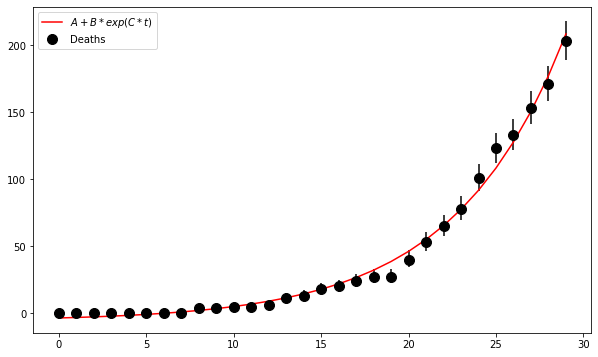

[-5.78265685  2.22442536  0.15751407]


In [22]:
from numpy import loadtxt, flip, sqrt
from pylab import plot,show,legend, errorbar,figure,yscale

Deaths,Cases = loadtxt("CovidData.csv",int,skiprows=1,usecols=(1,2), delimiter=",", unpack=True)

dayMin = 0
dayMax = 30
Deaths=flip(Deaths)
ErrDeaths = sqrt(Deaths)

ErrHighDeaths= 0.5+sqrt(Deaths+0.25)
ErrLowDeaths= -0.5+sqrt(Deaths+0.25)

tdays = range(dayMin,dayMax)

figure(figsize=(10,6))                 
errorbar(tdays,Deaths[dayMin:dayMax],
         [ErrLowDeaths[dayMin:dayMax],
          ErrHighDeaths[dayMin:dayMax]],
         ls='',marker='o', mfc='black',ms=10,mec='black',ecolor='black',label="Deaths")
#errorbar(tdays,Deaths[dayMin:dayMax],
#         ErrDeaths[dayMin:dayMax],
#        ls='',marker='o', mfc='black',ms=10,mec='black',ecolor='black',label="Deaths")
    


from scipy.optimize import curve_fit

# Create the fit as a function
# x = dependent var
# a b c are the parameters
def myfit(x,a,b,c):
    return a+b*exp(c*x)

param0 = (0,100,0.1)
paramfit, paramErr = curve_fit(myfit,tdays,
                               Deaths[dayMin:dayMax],
                               param0)

fitfun = myfit(tdays,paramfit[0],paramfit[1],paramfit[2])


plot(tdays,fitfun,"r",label="$A+B*exp(C*t)$")

legend()

show()

print(paramfit)

### Including Uncertainties in your fit.
Notice that the uncertainties in the data did not when into the fitting the functiona at all yet.

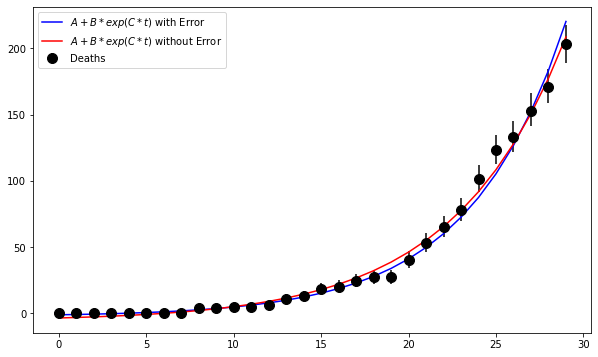

[-2.30131603  1.14242438  0.18178811]
[-5.78265685  2.22442536  0.15751407]


In [23]:
from numpy import loadtxt, flip, sqrt
from pylab import plot,show,legend, errorbar,figure,yscale

Deaths,Cases = loadtxt("CovidData.csv",int,skiprows=1,usecols=(1,2), delimiter=",", unpack=True)

dayMin = 0
dayMax = 30
Deaths=flip(Deaths)
ErrDeaths = sqrt(Deaths)

ErrHighDeaths= 0.5+sqrt(Deaths+0.25)
ErrLowDeaths= -0.5+sqrt(Deaths+0.25)

tdays = range(dayMin,dayMax)

figure(figsize=(10,6))                 
errorbar(tdays,Deaths[dayMin:dayMax],
         [ErrLowDeaths[dayMin:dayMax],
          ErrHighDeaths[dayMin:dayMax]],
         ls='',marker='o', mfc='black',ms=10,mec='black',ecolor='black',label="Deaths")
#errorbar(tdays,Deaths[dayMin:dayMax],
#         ErrDeaths[dayMin:dayMax],
#        ls='',marker='o', mfc='black',ms=10,mec='black',ecolor='black',label="Deaths")
    



from scipy.optimize import curve_fit

# Create the fit as a function
# x = dependent var
# a b c are the parameters
def myfit(x,a,b,c):
    return a+b*exp(c*x)

# make a list of the parameter's initial values

# a ~ -b
param0 = (0,100,0.1)
paramfitWithErr, paramErr = curve_fit(myfit,
                                      tdays,
                                      Deaths[dayMin:dayMax],
                                      param0,
                                      sigma=ErrHighDeaths[dayMin:dayMax])

fitfunWithError = myfit(tdays,paramfitWithErr[0],paramfitWithErr[1],paramfitWithErr[2])
plot(tdays,fitfunWithError,"b",label="$A+B*exp(C*t)$ with Error")
plot(tdays,fitfun,"r",label="$A+B*exp(C*t)$ without Error")
legend()
show()

print(paramfitWithErr)
print(paramfit)

In [24]:
print(paramErr)

[[ 2.19215409e-01 -7.02257444e-02  2.30383969e-03]
 [-7.02257444e-02  3.40348121e-02 -1.13801571e-03]
 [ 2.30383969e-03 -1.13801571e-03  3.89427657e-05]]


## Covariant Matrix to Uncertanties

This matrix will be N-parameter by N-parameter. The uncertainties in each parameters can be read out on the diagonal if we just square it it. $\delta p_i = cov[i,i]$.

In [14]:
print("Best fit value for a =", paramfitWithErr[0], "+/- ",sqrt(paramErr[0,0]))
print("Best fit value for b =", paramfitWithErr[1], "+/- ",sqrt(paramErr[1,1]))
print("Best fit value for c =", paramfitWithErr[2], "+/- ",sqrt(paramErr[2,2]))

Best fit value for a = -2.301316025979903 +/-  0.46820445223318996
Best fit value for b = 1.1424243781627903 +/-  0.18448526258012357
Best fit value for c = 0.18178811321022761 +/-  0.006240413901366032


## Interpeting the fit values

The fit function is: 
$$ N(t) = a + b~exp(c*t)$$

1/c should be the time constant of the exponential growth. It is kind of the opposite of time constant of an exponential decay. Which is also related to the half-life.<br>

$$ \tau = t_{1/2}*\sqrt2$$

If our case, we have the "double-time",
$$ \tau = 1/0.18 = 5.6 $$
$$ t_{double} = \tau / \sqrt2 = 4~days $$

This means the number of deaths doubles every 4 days.

## Extrapolating the function into the future.
We the fit function in place we can use it to extropolate what would have happen if California did not respond to the virus. <br> 

In [16]:
print("Extrapolated Cases of Covid if no intervention in California %.0f" 
      %myfit(100,paramfitWithErr[0],paramfitWithErr[1],paramfitWithErr[2]))

Extrapolated Cases of Covid if no intervention in California 89698441
